In [3]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l
d2l.use_svg_display()

In [2]:
import os
os.getcwd()

'F:\\doctor_learning\\DongShouXue\\d2l-zh\\class\\class3'

### 这里download=True是需要下载，路径再root里面，这里表示的是上一级目录的data文件夹下

In [20]:
# 通过ToTensor实例将图像数据从PIL类型变换成32位浮点数格式，
# 并除以255使得所有像素的数值均在0到1之间
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

In [27]:
len(mnist_train), len(mnist_test), mnist_train[0][0].shape

(60000, 10000, torch.Size([1, 28, 28]))

In [20]:
def get_fashion_mnist_labels(labels): #@save
    """返回Fashion-MNIST数据集的⽂本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
    'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [23]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1): #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图⽚张量
            ax.imshow(img.numpy())
        else:
            # PIL图⽚
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

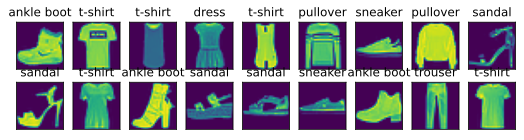

In [24]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

### 前面设置完dataset后，再使用dataloader进行小批量读取

In [28]:
batch_size = 256
train_iter = data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=4)

In [34]:
timer = d2l.Timer()
for X, y in train_iter:
    continue
f'{timer.stop():.2f} sec'

'1.76 sec'

### 定义一个函数，用于获取和读取Fashion数据集，最终返回训练集和验证机的数据迭代器
### 此外，增加一个可选参数resize，用来调整图像大小

### 这里transforms.Compose([a, b,...])是将多个transform操作整合一起的函数，每个函数a,b...为一个transform操作，记得他们是在一个列表里
### .insert是添加transform操作

In [1]:
def load_data_fashion_mnist(batch_size, resize=None): #@save
    """下载Fashion-MNIST数据集，然后将其加载到内存中"""
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    mnist_train = torchvision.datasets.FashionMNIST(
        root="../data", train=True, transform=trans, download=True)
    mnist_test = torchvision.datasets.FashionMNIST(
        root="../data", train=False, transform=trans, download=True)
    return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=4),
            data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=4))

In [4]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


In [19]:
X.shape[0], len(y)

(32, 32)

In [12]:
class Accumulator:  #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n
 
    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
 
    def reset(self):
        self.data = [0.0] * len(self.data)
 
    def __getitem__(self, idx):
        return self.data[idx]

In [37]:
metric = Accumulator(3)
print(f'初始的metric.data：{metric.data}')
metric.add(3,7,1)
print(f'第1次调用add后,metric.data：{metric.data}')
metric.add(5,8,1)
print(f'第2次调用add后,metric.data：{metric.data}')
print(metric.data[0])

初始的metric.data：[0.0, 0.0, 0.0]
第1次调用add后,metric.data：[3.0, 7.0, 1.0]
第2次调用add后,metric.data：[8.0, 15.0, 2.0]
8.0


In [38]:
a = [0, 0, 0]
b = [3, 7, 1]
for i, j in zip(a, b):
    print(i, j)

0 3
0 7
0 1
